<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Laboratorio08_SS_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 08

**Experimentos:**

**1. Calcular el tiempo promedio de espera con: tiempo entre llegadas de 1, 2, y 5 minutos por pieza siguiendo la distribución exponencial.**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

In [29]:
# Semilla aleatoria para reproducibilidad
np.random.seed(42)

def simulacion_un_servidor(media_entre_llegadas, n_piezas=10000):
    # Generar tiempos entre llegadas (distribución exponencial)
    aleatorios = np.random.rand(n_piezas)
    tiempos_entre_llegadas = -media_entre_llegadas * np.log(1 - aleatorios)
    tiempos_llegada = np.cumsum(tiempos_entre_llegadas)

    # Generar tiempos de inspección (distribución normal con media=4, desviación=0.5)
    aleatorios2 = np.random.rand(n_piezas)
    tiempos_inspeccion = norm.ppf(aleatorios2, loc=4, scale=0.5)

    # Listas para guardar tiempos de inicio y fin de inspección, y tiempos de espera
    inicio_inspeccion = [tiempos_llegada[0]]
    fin_inspeccion = []
    tiempos_espera = []

    for i in range(n_piezas):
        fin_inspeccion.append(inicio_inspeccion[-1] + tiempos_inspeccion[i])
        tiempos_espera.append(inicio_inspeccion[-1] - tiempos_llegada[i])

        # El siguiente inicio será el máximo entre la llegada siguiente y cuando el servidor esté libre
        if i + 1 < n_piezas:
            inicio_inspeccion.append(max(fin_inspeccion[-1], tiempos_llegada[i + 1]))

    return np.mean(tiempos_espera)

# Probar la simulación con diferentes medias de tiempo entre llegadas
medias_llegada = [1, 2, 5]
resultados_espera = []

for media in medias_llegada:
    espera_promedio = simulacion_un_servidor(media)
    resultados_espera.append(espera_promedio)
    print(f"Media entre llegadas: {media} min/pieza -> Tiempo promedio de espera = {espera_promedio:.2f} min")


Media entre llegadas: 1 min/pieza -> Tiempo promedio de espera = 15083.57 min
Media entre llegadas: 2 min/pieza -> Tiempo promedio de espera = 9840.96 min
Media entre llegadas: 5 min/pieza -> Tiempo promedio de espera = 8.52 min


**2. Calcular el tiempo promedio de espera con: tiempo entre llegadas de 1, 2 y 5 minutos por pieza siguiendo la distribución exponencial, añadiendo 2 estaciones de inspección cuya duración de inspección es de 4 min/pieza siguiendo una distribución normal.**

In [30]:
def simulacion_dos_servidores(media_entre_llegadas, n_piezas=10000):
    # Generar tiempos entre llegadas (distribución exponencial)
    aleatorios = np.random.rand(n_piezas)
    tiempos_entre_llegadas = -media_entre_llegadas * np.log(1 - aleatorios)
    tiempos_llegada = np.cumsum(tiempos_entre_llegadas)

    # Generar tiempos de inspección (Normal media=4, desviación=0.5)
    aleatorios2 = np.random.rand(n_piezas)
    tiempos_inspeccion = norm.ppf(aleatorios2, loc=4, scale=0.5)

    # Dos servidores paralelos (inician libres)
    fin_servidor = [0, 0]
    tiempos_espera = []

    for i in range(n_piezas):
        llegada = tiempos_llegada[i]
        duracion = tiempos_inspeccion[i]

        # Escoger el servidor que se libera antes
        servidor_libre = np.argmin(fin_servidor)
        inicio = max(llegada, fin_servidor[servidor_libre])

        # Actualizar tiempo de finalización del servidor elegido
        fin_servidor[servidor_libre] = inicio + duracion

        # Calcular y guardar el tiempo de espera
        tiempos_espera.append(inicio - llegada)

    return np.mean(tiempos_espera)


# Pruebas con diferentes medias de tiempo entre llegadas
medias_llegada = [1, 2, 5]
resultados_espera_dos = []

for media in medias_llegada:
    espera_promedio = simulacion_dos_servidores(media)
    resultados_espera_dos.append(espera_promedio)
    print(f"[2 servidores] Media entre llegadas: {media} min/pieza -> Tiempo promedio de espera = {espera_promedio:.2f} min")


[2 servidores] Media entre llegadas: 1 min/pieza -> Tiempo promedio de espera = 5029.34 min
[2 servidores] Media entre llegadas: 2 min/pieza -> Tiempo promedio de espera = 52.01 min
[2 servidores] Media entre llegadas: 5 min/pieza -> Tiempo promedio de espera = 0.41 min


**Correr los experimentos comparando sus posibles configuraciones y luego comparar entre los experimentos.**


COMPARACIÓN DE RESULTADOS


,Media entre llegadas (min),Espera promedio (1 Servidor),Espera promedio (2 Servidores)
0,1,15083.572771,5029.341902
1,2,9840.961187,52.005673
2,5,8.520097,0.405579


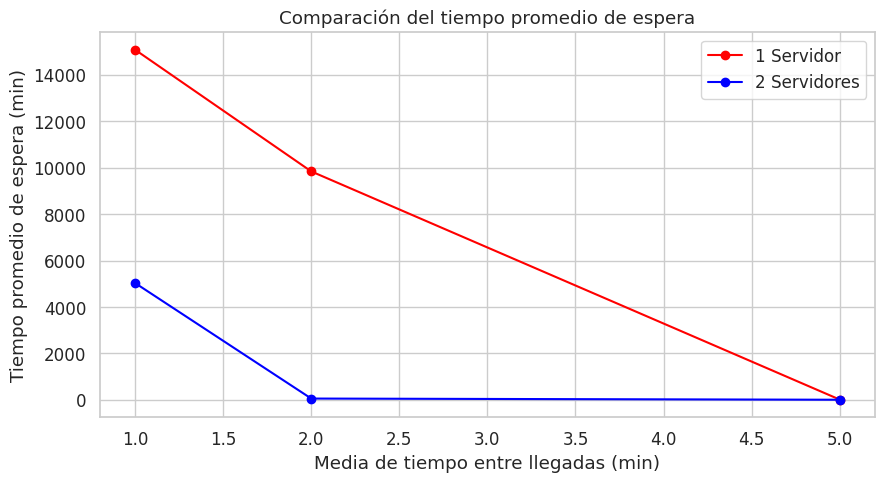

In [41]:
# Crear un DataFrame con los resultados de ambos experimentos
df_comparacion = pd.DataFrame({
    'Media entre llegadas (min)': medias_llegada,
    'Espera promedio (1 Servidor)': resultados_espera,
    'Espera promedio (2 Servidores)': resultados_espera_dos
})

print("\nCOMPARACIÓN DE RESULTADOS")
display(df_comparacion)

# Graficar comparación
plt.figure(figsize=(10, 5))
plt.plot(medias_llegada, resultados_espera, marker='o', label='1 Servidor', color='red')
plt.plot(medias_llegada, resultados_espera_dos, marker='o', label='2 Servidores', color='blue')
plt.xlabel("Media de tiempo entre llegadas (min)")
plt.ylabel("Tiempo promedio de espera (min)")
plt.title("Comparación del tiempo promedio de espera")
plt.legend()
plt.grid(True)
plt.show()
